In [44]:
import pandas as pd
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')


### Метод К-середніх (K-means)

In [45]:
wine = datasets.load_wine()
y = wine.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [46]:
model_wine = KMeans(n_clusters=3)

In [47]:
model_wine.fit(wine.data)

KMeans(n_clusters=3)

In [51]:
# Отримуємо мітки кластера від моделі
lables = model_wine.labels_
y = wine.target


In [52]:
def cf_metrics (wine, lables, y):
    print(f'Homogeneity:{metrics.homogeneity_score(y,lables):.3f}')
    print(f'Completeness:{metrics.completeness_score(y,lables):.3f}')
    print(f'V-measure:{metrics.v_measure_score(y,lables):.3f}')
    print(f'Adjusted Rand Index:{metrics.adjusted_rand_score(y,lables):.3f}')
    print(f'Adjusted Mutual Information:{metrics.adjusted_mutual_info_score(y,lables):.3f}')
    print(f'Homogeneity:{metrics.homogeneity_score(y,lables):.3f}')
    

In [53]:
cf_metrics(wine, lables, y)

Homogeneity:0.429
Completeness:0.429
V-measure:0.429
Adjusted Rand Index:0.371
Adjusted Mutual Information:0.423
Homogeneity:0.429


In [54]:
prediction = model_wine.predict(wine.data)
prediction

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

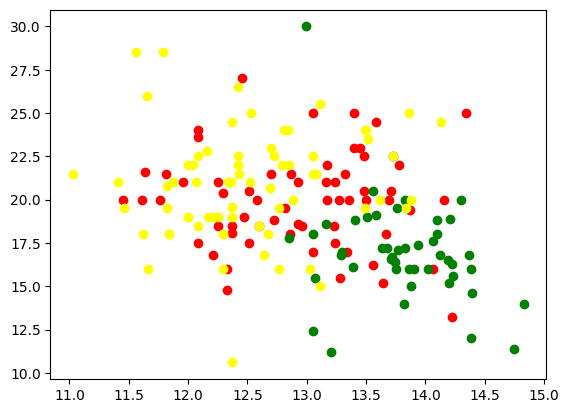

In [57]:
cluster_0 = wine.data [prediction ==0]
cluster_1 = wine.data [prediction ==1]
cluster_2 = wine.data [prediction ==2]
plt.scatter(cluster_0[:,0], cluster_0[0:,3], color = 'red')
plt.scatter(cluster_1[:,0], cluster_1[0:,3], color = 'green')
plt.scatter(cluster_2[:,0], cluster_2[0:,3], color = 'yellow')


#### *Висновок: Відповідно до отриманих результатів метрик  оцінки якості кластеризації свідчать про середній рівень якості кластеризації.  Показники мають подібні значення, що свідчить про средній  баланс між групуванням елементів одного класа в кластери і правильністю групувіання всіх елементів одного класу.* 

### Кластерізація на основі щільності (DBSCAN)

In [58]:
from sklearn.decomposition import PCA

In [59]:
model_db = DBSCAN(eps=0.4, min_samples=4)

In [60]:
model_db.fit(wine.data)

DBSCAN(eps=0.4, min_samples=4)

In [61]:
pca = PCA(n_components=2).fit(wine.data)
pca_2d = pca.transform(wine.data)

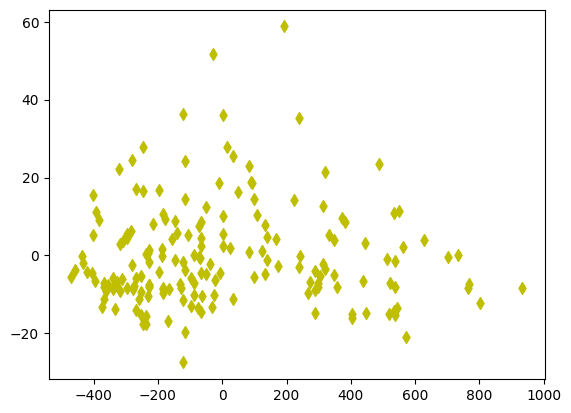

In [62]:
for i in range(0, pca_2d.shape[0]):
    if model_db.labels_[i]==0:
        cluster = plt.scatter(pca_2d[i,0],pca_2d[i,1], c = 'r', marker='+')
    if model_db.labels_[i]==1:
        cluster = plt.scatter(pca_2d[i,0],pca_2d[i,1], c = 'g', marker='o')
    if model_db.labels_[i]==2:
        cluster = plt.scatter(pca_2d[i,0],pca_2d[i,1], c = 'b', marker='*')
    elif model_db.labels_[i]== -1:
        cluster = plt.scatter(pca_2d[i,0],pca_2d[i,1], c = 'y', marker='d')

#### *Висновок:Як показує візуалізація проведеної кластеризації з використанням алгоритму на основі щільності DBSCAN, ми спостерігаємо безперервне згущення даних, яке можна інтерпретувати як шум (відсутність чітких кластерів)* 

### Ієрархічний кластерний аналіз

In [63]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [64]:
mergening = linkage(wine.data, method='complete') 

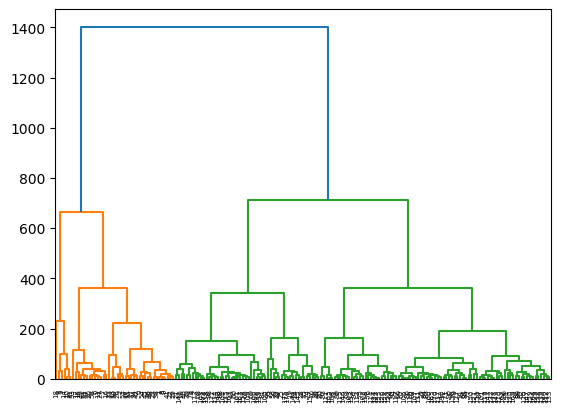

In [65]:
clusters = dendrogram(mergening, leaf_rotation= 90)